## IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pwd

/home/emirpsumitpo/Documents/DS/adult-income-pred-model/notebook


## KNOWING THE DATA WELL

In [3]:
data = pd.read_csv("./data/adult_income.csv")
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


RENAMING COLUMNS

In [4]:
data.rename(columns={'marital-status': "maritalStatus", "educational-num":"educationalNum", "capital-gain":"capitalGain", "capital-loss":"capitalLoss", "hours-per-week":"hoursPerWeek", "native-country":"nativeCountry"}, inplace=True)
data

,age,workclass,fnlwgt,education,educationalNum,maritalStatus,occupation,relationship,race,gender,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data.shape

(48842, 15)

In [6]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationalNum',
       'maritalStatus', 'occupation', 'relationship', 'race', 'gender',
       'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry',
       'income'],
      dtype='object')

In [7]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
educationalNum     int64
maritalStatus     object
occupation        object
relationship      object
race              object
gender            object
capitalGain        int64
capitalLoss        int64
hoursPerWeek       int64
nativeCountry     object
income            object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   educationalNum  48842 non-null  int64 
 5   maritalStatus   48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   gender          48842 non-null  object
 10  capitalGain     48842 non-null  int64 
 11  capitalLoss     48842 non-null  int64 
 12  hoursPerWeek    48842 non-null  int64 
 13  nativeCountry   48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
educationalNum    0
maritalStatus     0
occupation        0
relationship      0
race              0
gender            0
capitalGain       0
capitalLoss       0
hoursPerWeek      0
nativeCountry     0
income            0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(52)

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.describe()

,age,fnlwgt,educationalNum,capitalGain,capitalLoss,hoursPerWeek
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
data.describe(include='object')

,workclass,education,maritalStatus,occupation,relationship,race,gender,nativeCountry,income
count,48790,48790,48790,48790,48790,48790,48790,48790,48790
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,15770,22366,6165,19703,41714,32614,43792,37109


In [14]:
categorical_columns = data.select_dtypes(include="object").columns
numerical_columns = data.select_dtypes(exclude="object").columns

print(categorical_columns)
print()
print("**********************************************************************************")
print()
print(numerical_columns)


Index(['workclass', 'education', 'maritalStatus', 'occupation', 'relationship',
       'race', 'gender', 'nativeCountry', 'income'],
      dtype='object')

**********************************************************************************

Index(['age', 'fnlwgt', 'educationalNum', 'capitalGain', 'capitalLoss',
       'hoursPerWeek'],
      dtype='object')


In [15]:
for col in categorical_columns:
    print(col, data[col].unique())

    print()
    print("**********************************************************************************")
    print()


workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

**********************************************************************************

education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

**********************************************************************************

maritalStatus ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

**********************************************************************************

occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']

****************************************************

In [16]:
data['workclass'] = data['workclass'].replace("?", "Private")
data['occupation'] = data['occupation'].replace("?", "Prof-specialty")
data['nativeCountry'] = data['nativeCountry'].replace("?", "United-States")

## VISUALIZATION

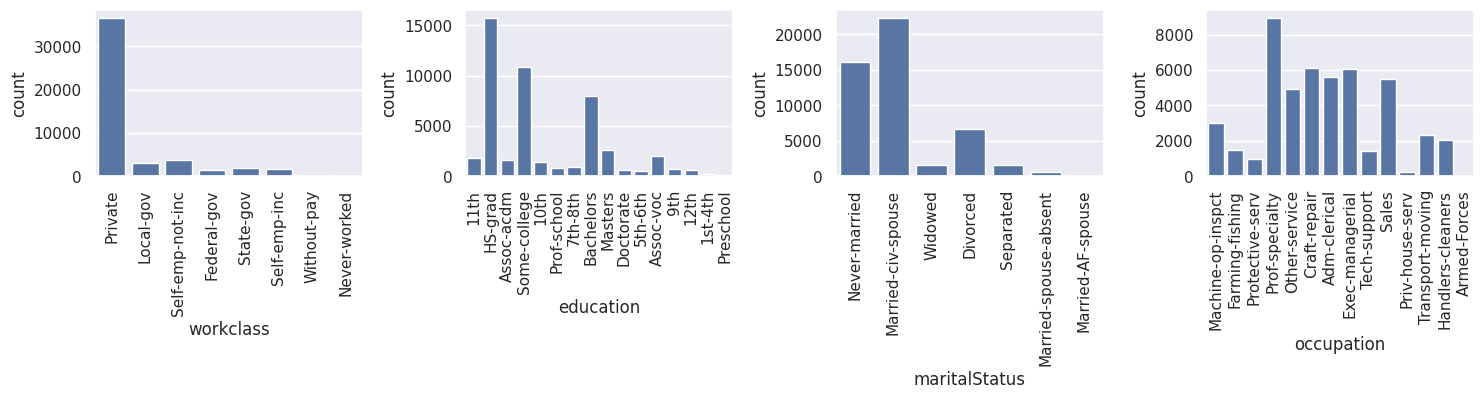

In [17]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(15, 6)})

col1 = ['workclass', 'education', 'maritalStatus', 'occupation']

for i in range (0, len(col1)):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=data[col1[i]])
    plt.xticks(rotation=90)
    plt.tight_layout()

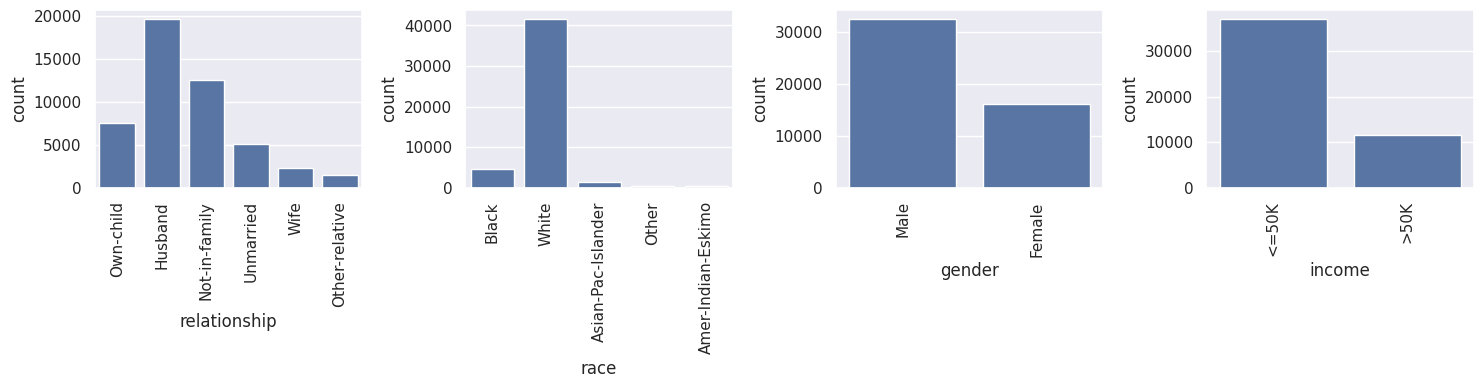

In [18]:
col2 = ['relationship', 'race', 'gender', 'income']

for i in range (0, len(col2)):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=data[col2[i]])
    plt.xticks(rotation=90)
    plt.tight_layout()

In [19]:
# plt.suptitle('Distribution Of Numerical Columns')

# for i in range (0, len(numerical_columns)):
#     plt.subplot(2, 4, i+1)
#     sns.countplot(x=data[numerical_columns[i]])
#     plt.xticks(rotation=90)
#     plt.tight_layout()

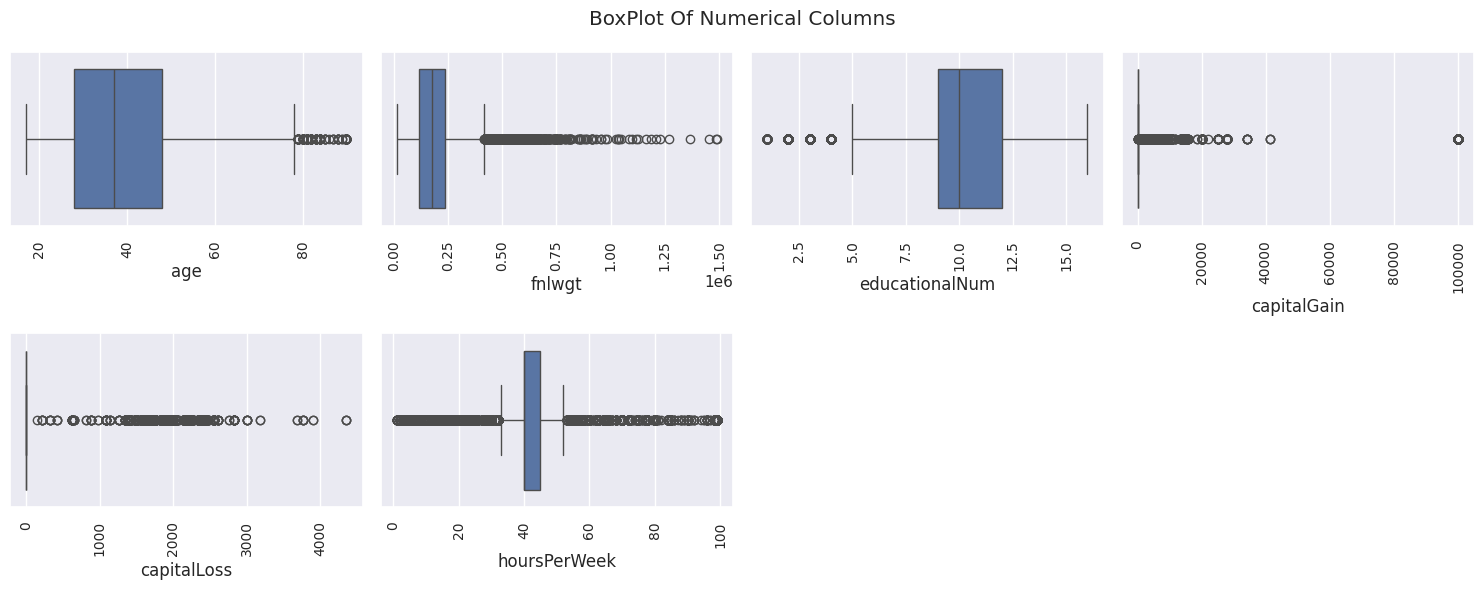

In [20]:
plt.suptitle('BoxPlot Of Numerical Columns')

for i in range (0, len(numerical_columns)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=data[numerical_columns[i]])
    plt.xticks(size=10, rotation=90)
    plt.tight_layout()

<Axes: xlabel='income'>

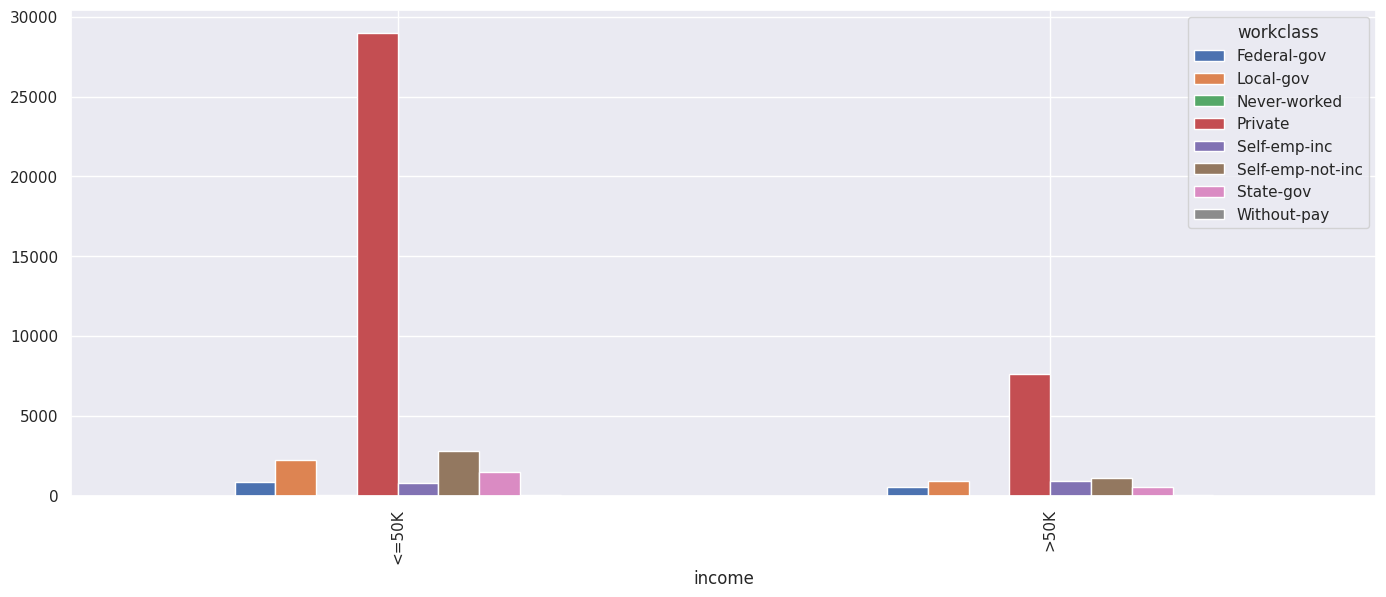

In [21]:
salary = pd.crosstab(data['income'], data['workclass'])
salary.plot(kind='bar')

<Axes: xlabel='income'>

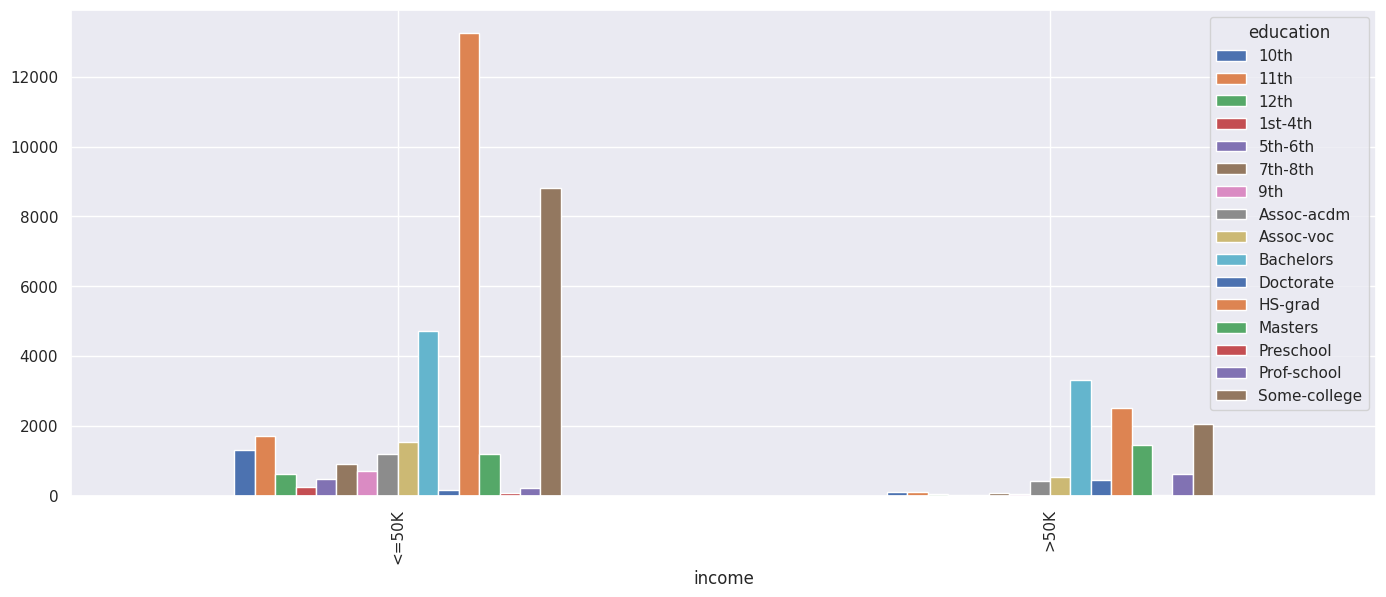

In [22]:
education = pd.crosstab(data['income'], data['education'])
education.plot(kind='bar')

<Axes: xlabel='income'>

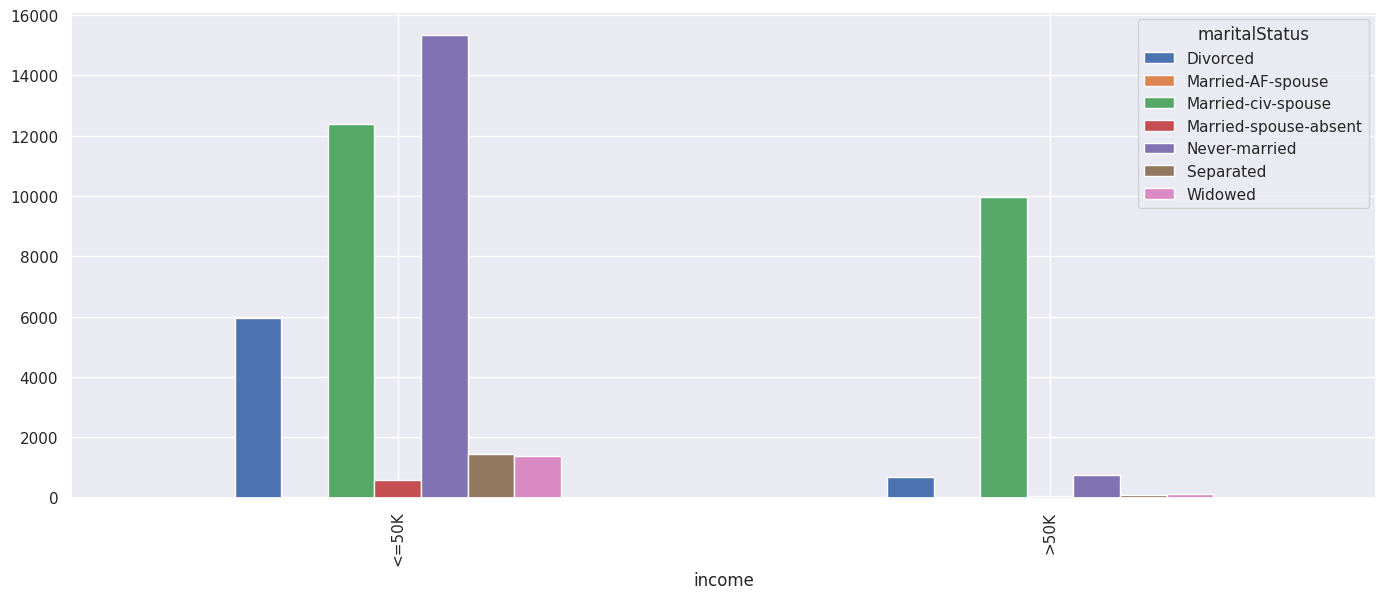

In [23]:
marital_status = pd.crosstab(data['income'],data['maritalStatus'])
marital_status.plot(kind="bar")

<Axes: xlabel='income'>

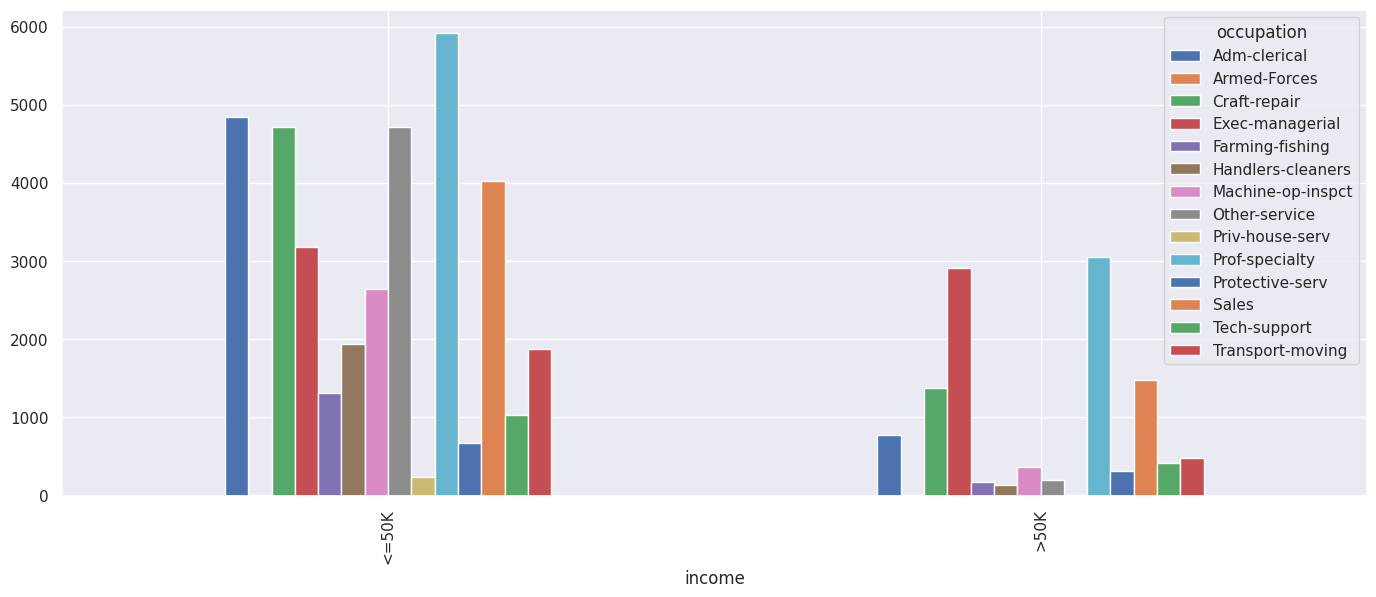

In [24]:
occupation = pd.crosstab(data['income'],data['occupation'])
occupation.plot(kind="bar")

<Axes: xlabel='income'>

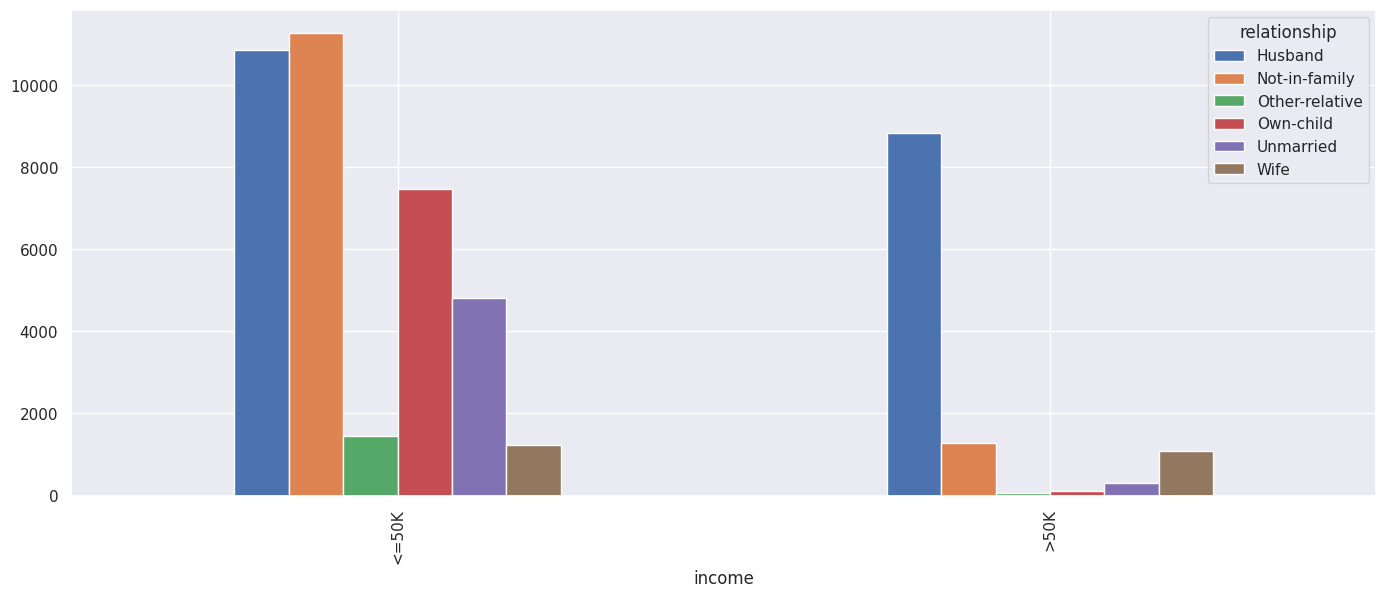

In [25]:
relationship = pd.crosstab(data['income'],data['relationship'])
relationship.plot(kind="bar")

<Axes: xlabel='income'>

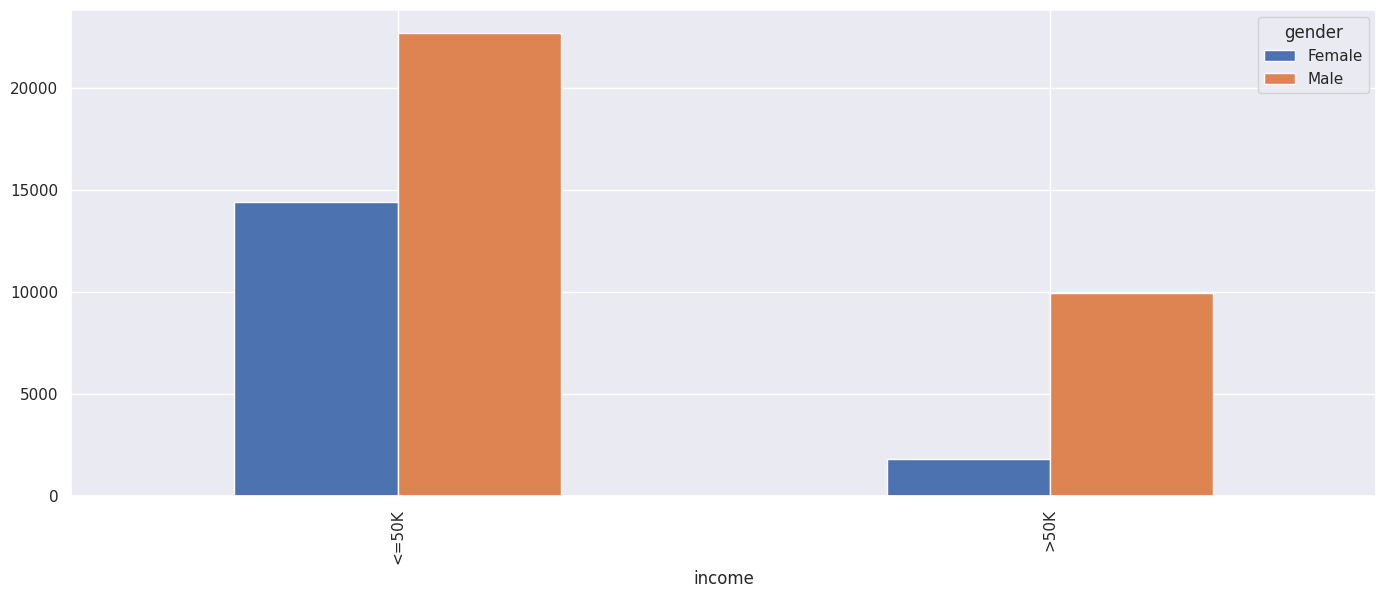

In [26]:
gender = pd.crosstab(data['income'],data['gender'])
gender.plot(kind="bar")

## LABEL ENCODING

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_columns:
    le.fit(data[col])
    data[col] = le.transform(data[col])

In [29]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nLabel Encoding Mapping:")
print(mapping)


Label Encoding Mapping:
{'<=50K': np.int64(0), '>50K': np.int64(1)}


<Axes: >

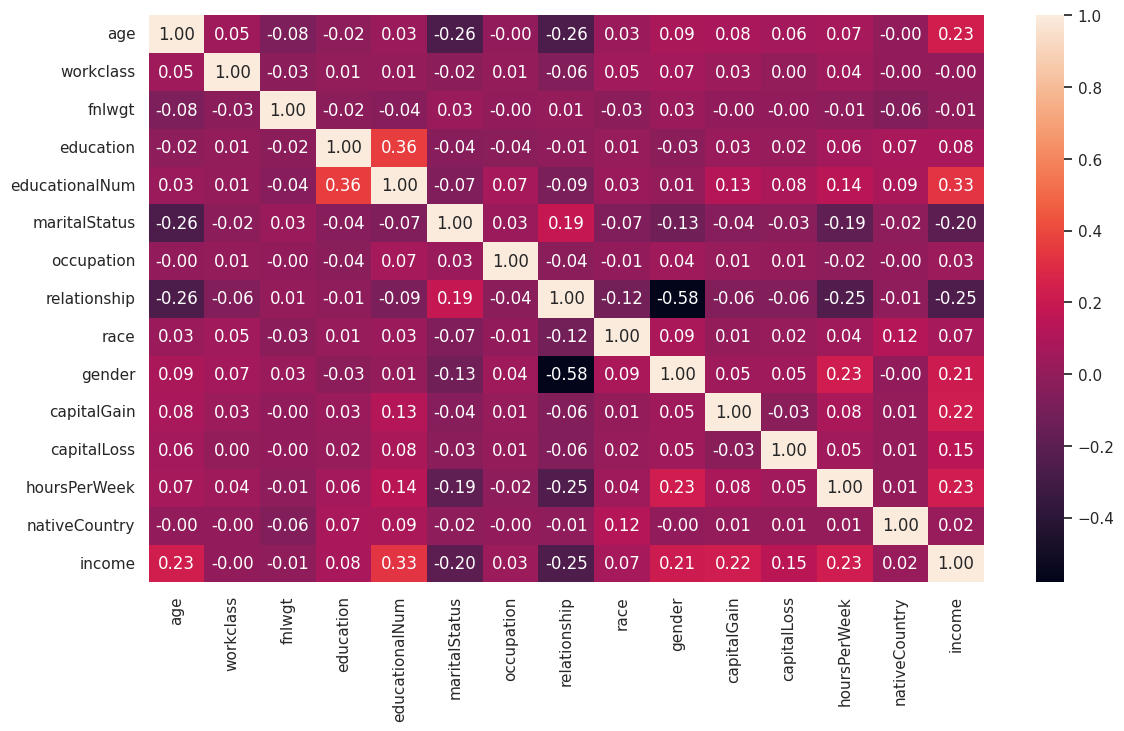

In [36]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

In [40]:
data.drop(['education', 'fnlwgt', 'nativeCountry'], axis=1, inplace=True)

In [41]:
data

,age,workclass,educationalNum,maritalStatus,occupation,relationship,race,gender,capitalGain,capitalLoss,hoursPerWeek,income
0,25,3,7,4,6,3,2,1,0,0,40,0
1,38,3,9,2,4,0,4,1,0,0,50,0
2,28,1,12,2,10,0,4,1,0,0,40,1
3,44,3,10,2,6,0,2,1,7688,0,40,1
4,18,3,10,4,9,3,4,0,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,12,2,12,5,4,0,0,0,38,0
48838,40,3,9,2,6,0,4,1,0,0,40,1
48839,58,3,9,6,0,4,4,0,0,0,40,0
48840,22,3,9,4,0,3,4,1,0,0,20,0


## MODEL TRAINING

In [43]:
X = data.drop("income", axis=1)
y = data['income']

In [44]:
categorical_features = X.select_dtypes(include="object").columns
numerical_features = X.select_dtypes(exclude="object").columns

In [84]:
numerical_features

Index(['age', 'workclass', 'educationalNum', 'maritalStatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalGain', 'capitalLoss',
       'hoursPerWeek'],
      dtype='object')

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [47]:
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)


preprocessor = ColumnTransformer([
    ("num_pipeline", num_pipeline, numerical_features)
])

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [50]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(36592, 11) (12198, 11) (36592,) (12198,)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay

In [52]:
def performance_metrices(test, predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    
    precision = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    
    return confusionmetrix,precision,recall,f1score,accuracyscore

In [53]:
lr = LogisticRegression()

In [54]:
params = {
    "class_weight":["balanced"],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [55]:
grid_CV = GridSearchCV(estimator=lr, param_grid=params, cv=5, n_jobs=1, verbose=3)

In [56]:
grid_CV.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.712 total time=   0.1s
[CV 2/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.705 total time=   0.1s
[CV 3/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.708 total time=   0.1s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.703 total time=   0.1s
[CV 5/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.701 total time=   0.1s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.001, class_weight=balanced, penalty=l1, solver=saga;, score=0.781 total time=   1.3s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.001, class_weight=balanced, penalty=l1, solver=saga;, score=0.775 total time=   1.4s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.001, class_weight=balanced, penalty=l1, solver=saga;, score=0.782 total time=   1.3s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.001, class_weight=balanced, penalty=l1, solver=saga;, score=0.781 total time=   1.4s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.001, class_weight=balanced, penalty=l1, solver=saga;, score=0.785 total time=   1.4s
[CV 1/5] END C=0.001, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.727 total time=   0.2s
[CV 2/5] END C=0.001, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.726 total time=   0.2s
[CV 3/5] END C=0.001, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.728 total time=   0.2s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.720 total time=   0.2s
[CV 5/5] END C=0.001, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.722 total time=   0.2s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.001, class_weight=balanced, penalty=l2, solver=saga;, score=0.781 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.001, class_weight=balanced, penalty=l2, solver=saga;, score=0.775 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.001, class_weight=balanced, penalty=l2, solver=saga;, score=0.782 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.001, class_weight=balanced, penalty=l2, solver=saga;, score=0.781 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.001, class_weight=balanced, penalty=l2, solver=saga;, score=0.785 total time=   0.6s
[CV 1/5] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.760 total time=   0.2s
[CV 2/5] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.759 total time=   0.1s
[CV 3/5] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.762 total time=   0.1s
[CV 4/5] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.755 total time=   0.1s
[CV 5/5] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.758 total time=   0.2s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.01, class_weight=balanced, penalty=l1, solver=saga;, score=0.781 total time=   0.8s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.01, class_weight=balanced, penalty=l1, solver=saga;, score=0.775 total time=   0.8s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.01, class_weight=balanced, penalty=l1, solver=saga;, score=0.782 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.01, class_weight=balanced, penalty=l1, solver=saga;, score=0.781 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.01, class_weight=balanced, penalty=l1, solver=saga;, score=0.785 total time=   0.8s
[CV 1/5] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.730 total time=   0.2s
[CV 2/5] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.740 total time=   0.2s
[CV 3/5] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.729 total time=   0.1s
[CV 4/5] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.724 total time=   0.2s
[CV 5/5] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.729 total time=   0.2s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.01, class_weight=balanced, penalty=l2, solver=saga;, score=0.781 total time=   0.6s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.01, class_weight=balanced, penalty=l2, solver=saga;, score=0.775 total time=   0.6s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.01, class_weight=balanced, penalty=l2, solver=saga;, score=0.782 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.01, class_weight=balanced, penalty=l2, solver=saga;, score=0.781 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.01, class_weight=balanced, penalty=l2, solver=saga;, score=0.785 total time=   0.6s
[CV 1/5] END C=0.1, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.765 total time=   0.2s
[CV 2/5] END C=0.1, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.767 total time=   0.2s
[CV 3/5] END C=0.1, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.772 total time=   0.2s
[CV 4/5] END C=0.1, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.769 total time=   0.2s
[CV 5/5] END C=0.1, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.763 total time=   0.1s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.1, class_weight=balanced, penalty=l1, solver=saga;, score=0.781 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.1, class_weight=balanced, penalty=l1, solver=saga;, score=0.775 total time=   0.8s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.1, class_weight=balanced, penalty=l1, solver=saga;, score=0.782 total time=   0.8s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.1, class_weight=balanced, penalty=l1, solver=saga;, score=0.781 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.1, class_weight=balanced, penalty=l1, solver=saga;, score=0.785 total time=   0.7s
[CV 1/5] END C=0.1, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.728 total time=   0.2s
[CV 2/5] END C=0.1, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.741 total time=   0.2s
[CV 3/5] END C=0.1, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.728 total time=   0.2s
[CV 4/5] END C=0.1, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.721 total time=   0.2s
[CV 5/5] END C=0.1, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.727 total time=   0.2s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.1, class_weight=balanced, penalty=l2, solver=saga;, score=0.781 total time=   0.6s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.1, class_weight=balanced, penalty=l2, solver=saga;, score=0.775 total time=   0.6s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.1, class_weight=balanced, penalty=l2, solver=saga;, score=0.782 total time=   0.6s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.1, class_weight=balanced, penalty=l2, solver=saga;, score=0.781 total time=   0.6s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.1, class_weight=balanced, penalty=l2, solver=saga;, score=0.785 total time=   0.6s
[CV 1/5] END C=1, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.765 total time=   0.2s
[CV 2/5] END C=1, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.766 total time=   0.1s
[CV 3/5] END C=1, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.774 total time=   0.2s
[CV 4/5] END C=1, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.768 total time=   0.1s
[CV 5/5] END C=1, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.764 total time=   0.2s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, penalty=l1, solver=saga;, score=0.781 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, penalty=l1, solver=saga;, score=0.775 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, penalty=l1, solver=saga;, score=0.782 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, penalty=l1, solver=saga;, score=0.781 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, penalty=l1, solver=saga;, score=0.785 total time=   0.7s
[CV 1/5] END C=1, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.738 total time=   0.2s
[CV 2/5] END C=1, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.742 total time=   0.2s
[CV 3/5] END C=1, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.728 total time=   0.1s
[CV 4/5] END C=1, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.751 total time=   0.2s
[CV 5/5] END C=1, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.729 total time=   0.2s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, penalty=l2, solver=saga;, score=0.781 total time=   0.6s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, penalty=l2, solver=saga;, score=0.775 total time=   0.6s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, penalty=l2, solver=saga;, score=0.782 total time=   0.6s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, penalty=l2, solver=saga;, score=0.781 total time=   0.6s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, penalty=l2, solver=saga;, score=0.785 total time=   0.6s
[CV 1/5] END C=10, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.764 total time=   0.2s
[CV 2/5] END C=10, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.766 total time=   0.2s
[CV 3/5] END C=10, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.770 total time=   0.1s
[CV 4/5] END C=10, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.769 total time=   0.2s
[CV 5/5] END C=10, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.762 total time=   0.1s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, penalty=l1, solver=saga;, score=0.781 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, penalty=l1, solver=saga;, score=0.775 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, penalty=l1, solver=saga;, score=0.782 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, penalty=l1, solver=saga;, score=0.781 total time=   0.8s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, penalty=l1, solver=saga;, score=0.785 total time=   0.7s
[CV 1/5] END C=10, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.728 total time=   0.1s
[CV 2/5] END C=10, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.741 total time=   0.2s
[CV 3/5] END C=10, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.728 total time=   0.1s
[CV 4/5] END C=10, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.763 total time=   0.3s
[CV 5/5] END C=10, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.726 total time=   0.2s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, penalty=l2, solver=saga;, score=0.781 total time=   0.6s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, penalty=l2, solver=saga;, score=0.775 total time=   0.6s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, penalty=l2, solver=saga;, score=0.782 total time=   0.6s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, penalty=l2, solver=saga;, score=0.781 total time=   0.6s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, penalty=l2, solver=saga;, score=0.785 total time=   0.6s
[CV 1/5] END C=100, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.764 total time=   0.2s
[CV 2/5] END C=100, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.766 total time=   0.1s
[CV 3/5] END C=100, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.773 total time=   0.3s
[CV 4/5] END C=100, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.769 total time=   0.2s
[CV 5/5] END C=100, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.764 total time=   0.2s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, class_weight=balanced, penalty=l1, solver=saga;, score=0.781 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=100, class_weight=balanced, penalty=l1, solver=saga;, score=0.775 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, class_weight=balanced, penalty=l1, solver=saga;, score=0.782 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, class_weight=balanced, penalty=l1, solver=saga;, score=0.781 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=100, class_weight=balanced, penalty=l1, solver=saga;, score=0.785 total time=   0.7s
[CV 1/5] END C=100, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.728 total time=   0.1s
[CV 2/5] END C=100, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.741 total time=   0.2s
[CV 3/5] END C=100, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.728 total time=   0.1s
[CV 4/5] END C=100, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.721 total time=   0.1s
[CV 5/5] END C=100, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.729 total time=   0.2s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, class_weight=balanced, penalty=l2, solver=saga;, score=0.781 total time=   0.6s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=100, class_weight=balanced, penalty=l2, solver=saga;, score=0.775 total time=   0.6s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, class_weight=balanced, penalty=l2, solver=saga;, score=0.782 total time=   0.6s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, class_weight=balanced, penalty=l2, solver=saga;, score=0.781 total time=   0.6s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=100, class_weight=balanced, penalty=l2, solver=saga;, score=0.785 total time=   0.7s


/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [57]:
grid_CV.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}

In [58]:
grid_CV.score(X_train, y_train)

0.7809357236554438

In [59]:
y_pred = grid_CV.predict(X_test)

In [60]:
accuracy_score(y_test, y_pred)

0.7782423348089851

In [61]:
dtc = DecisionTreeClassifier()

In [62]:
param_dtc = {
    "class_weight":["balanced"],
    "criterion":['gini',"entropy","log_loss"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto","sqrt","log2"]
}

In [63]:
grid_CV = GridSearchCV(estimator=dtc, param_grid=param_dtc, cv=5, scoring="accuracy")

In [64]:
grid_CV.fit(X_train, y_train)

/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1440 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/emirpsumitpo/Documents/DS/adult-income-pred-model/env/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/emirpsumitpo/Documents/DS/ad

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [65]:
grid_CV.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'splitter': 'best'}

In [66]:
grid_CV.score(X_train, y_train)

0.789844774814167

In [67]:
y_pred = grid_CV.predict(X_test)

In [68]:
accuracy_score(y_test, y_pred)

0.7857845548450566

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.77      0.84      9255
           1       0.54      0.84      0.65      2943

    accuracy                           0.79     12198
   macro avg       0.74      0.80      0.75     12198
weighted avg       0.84      0.79      0.80     12198



In [72]:
rfc = RandomForestClassifier()

In [74]:
param_rfc = {
    "class_weight":["balanced"],
    'n_estimators': [20, 50, 30],
    'max_depth': [10, 8, 5],
    'min_samples_split': [2, 5, 10],
}

In [77]:
grid_CV = GridSearchCV(estimator=rfc, param_grid=param_rfc, cv=5, scoring="accuracy")

In [78]:
grid_CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [79]:
grid_CV.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 50}

In [80]:
grid_CV.score(X_train,y_train)

0.8186488850021862

In [81]:
y_pred = grid_CV.predict(X_test)

In [82]:
accuracy_score(y_test,y_pred)

0.8086571569109691

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      9255
           1       0.57      0.88      0.69      2943

    accuracy                           0.81     12198
   macro avg       0.76      0.83      0.78     12198
weighted avg       0.86      0.81      0.82     12198

